Study the gap between ground state (MEC) and first excited states.

In [2]:
from __future__ import annotations
from utils_to_build_QAOAAnsatz import *

# from random_instances import info_dim6 as info
from Wang_instances import info_dim6 as info

In [3]:
def compute_k_gap(n, instance, k, verbose):
    U, subsets_dict = define_instance(n, instance, verbose=False)

    # Find exact covers.
    ec = info[instance]["exact_covers"]
    ec = sorted(ec, key=lambda x: x.count('1'))
    mec = ec[0]

    # Compute the feasible spectrum.
    _, _, states, energies, _ = find_spectrum(U, subsets_dict, n, k)

    # Sort states and energies with increasing energy.
    sorted_pairs = sorted(zip(energies, states))
    energies_sorted = [energy for energy, _ in sorted_pairs]
    states_sorted = [state for _, state in sorted_pairs]       

    # Compute energy gap.
    gap = energies_sorted[1] - energies_sorted[0]
    total_energy = max(energies) - min(energies)
    percentage_gap = gap / total_energy * 100

    if verbose:
        print(f"=== k = {k} ===")
        if states_sorted[0] == mec: 
            print("GS is MEC: True") 
        else:
            print("GS is MEC: False")
        if len(ec) > 1:
            if states_sorted[1] in ec and states_sorted[1] != mec:
                print("1st excited is an EC: True")
            else:
                print("1st excited is an EC: False")

    return percentage_gap

In [4]:
n = 6
for instance in np.arange(1, 5):
    print(f"\n------------------")
    print(f"--- Instance {instance} ---")
    print(f"------------------")
    
    # Get and sort exact covers by increasing number of '1's
    ec = info[instance]["exact_covers"]
    ec = sorted(ec, key=lambda x: x.count('1'))
    mec = ec[0]
    
    
    L_list = [e.count("1") - 1 for e in ec]
    k_list = [k_from_L(n, instance, L) for L in L_list] + [1]
    
    gap_list = []
    for k in k_list:
        gap_list.append(compute_k_gap(n, instance, k, verbose=True))

    gap_list = [str(round(g,2))+'%' for g in gap_list]

    print("ec = ", ec)
    print("\ngap_list", gap_list)
    print("k_list", k_list)
    print("L_list", L_list)


------------------
--- Instance 1 ---
------------------
=== k = 0.1111111111111111 ===
GS is MEC: True
=== k = 1 ===
GS is MEC: True
ec =  ['101100']

gap_list ['20.0%', '24.64%']
k_list [0.1111111111111111, 1]
L_list [2]

------------------
--- Instance 2 ---
------------------
=== k = 0.08333333333333333 ===
GS is MEC: True
=== k = 1 ===
GS is MEC: True
ec =  ['011000']

gap_list ['50.0%', '50.0%']
k_list [0.08333333333333333, 1]
L_list [1]

------------------
--- Instance 3 ---
------------------
=== k = 0.08333333333333333 ===
GS is MEC: True
1st excited is an EC: False
=== k = 0.16666666666666666 ===
GS is MEC: True
1st excited is an EC: True
=== k = 1 ===
GS is MEC: True
1st excited is an EC: True
ec =  ['011000', '110001']

gap_list ['25.0%', '10.0%', '1.43%']
k_list [0.08333333333333333, 0.16666666666666666, 1]
L_list [1, 2]

------------------
--- Instance 4 ---
------------------
=== k = 0.05555555555555555 ===
GS is MEC: True
1st excited is an EC: False
=== k = 0.111111111

Exact covers for instance 1: ['101100']
Exact covers for instance 2: ['011000']
Exact covers for instance 3: ['011000', '110001']
Exact covers for instance 4: ['100100', '011001']
Exact covers for instance 5: ['010010', '101101']
Exact covers for instance 6: ['100010', '011100', '010011']
Exact covers for instance 7: ['110100']
Exact covers for instance 8: ['011001']
Exact covers for instance 9: ['110000']
Exact covers for instance 10: ['100100']


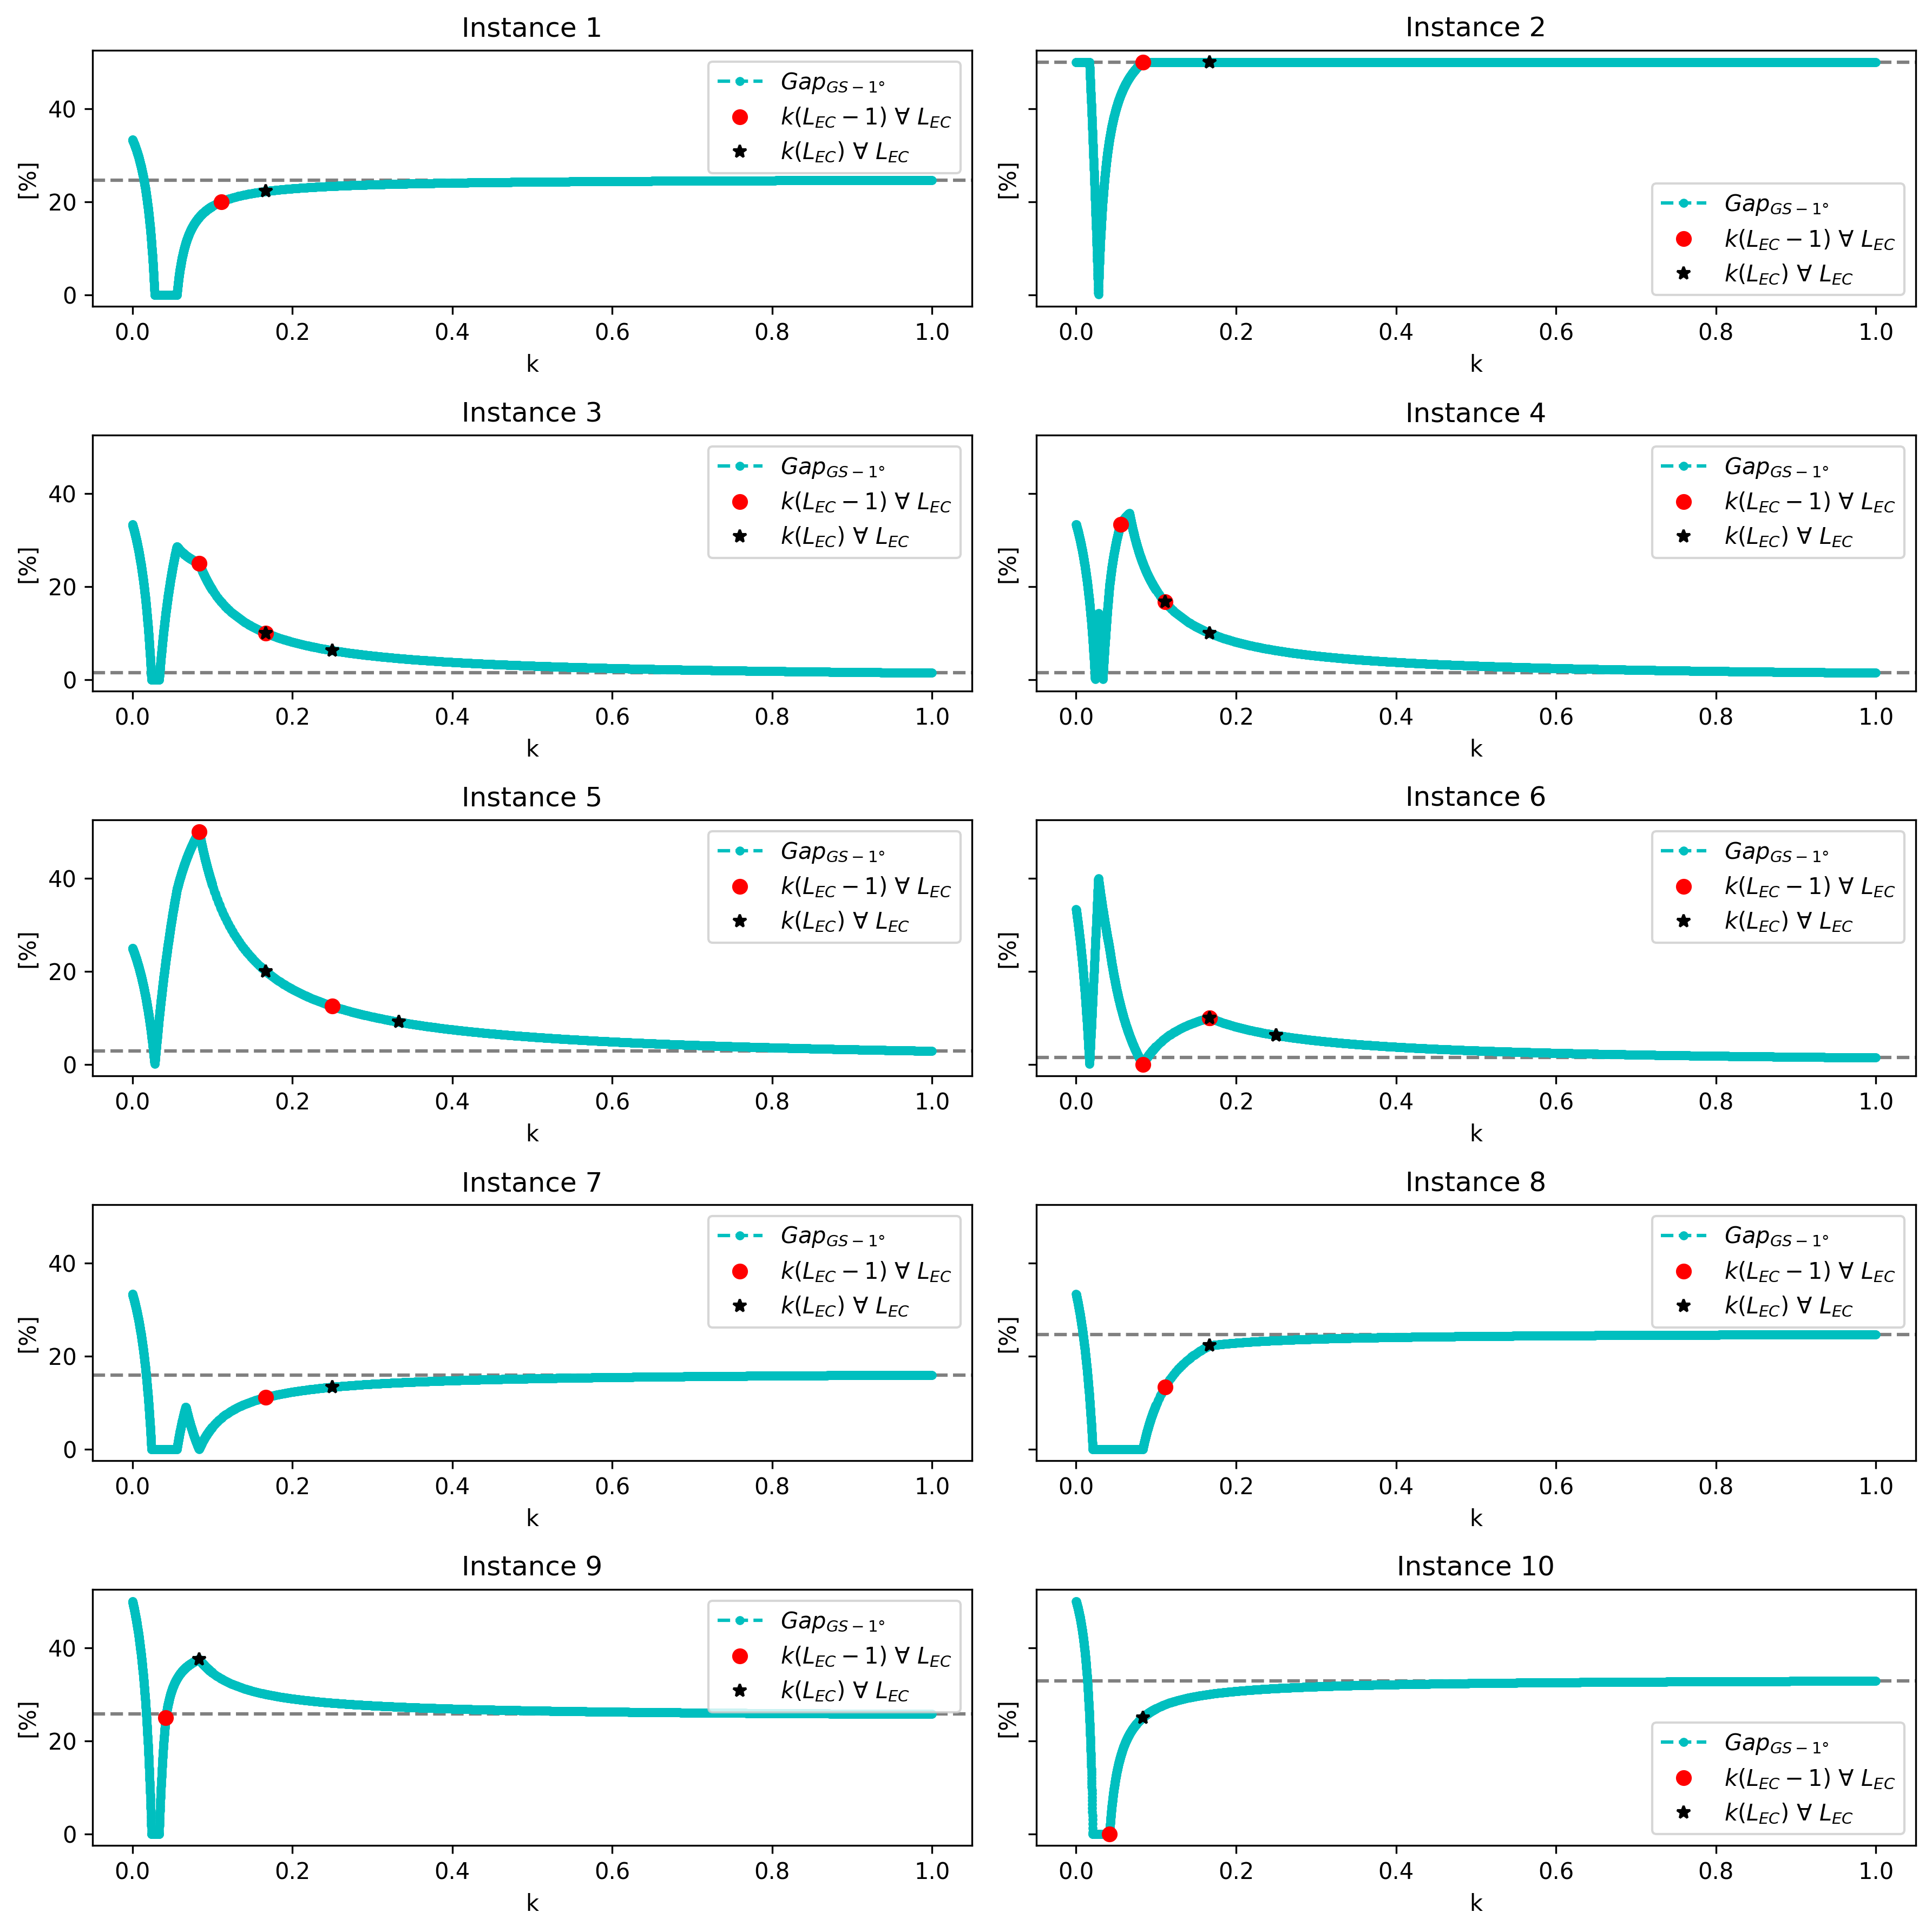

In [13]:
fig, axs = plt.subplots(5, 2, figsize=(12, 12), dpi=300, sharey=True)
# fig.suptitle("Gap ground state – 1° excited ")
axs = axs.flatten() 

for idx, instance in enumerate(np.arange(1, 11)):
    # Get and sort exact covers by increasing number of '1's
    ec = info[instance]["exact_covers"]
    ec = sorted(ec, key=lambda x: x.count('1'))
    mec = ec[0]
    print(f"Exact covers for instance {instance}: {ec}")
    
    # Cyan line.
    ks = np.concatenate([np.linspace(0, 0.1, 1000, endpoint=False),
                         np.linspace(0.1, 1, 1000)])  
    gaps = [compute_k_gap(n, instance, k, verbose=False) for k in ks]
    
    # Red points for L-1.
    Ls = [e.count("1") - 1 for e in ec]
    ks_from_Ls = [k_from_L(n, instance, L) for L in Ls]
    gaps_from_Ls = [compute_k_gap(n, instance, k, verbose=False) for k in ks_from_Ls]
    
    # Black stars for L.
    Ls2 = [e.count("1") for e in ec]
    ks_from_Ls2 = [k_from_L(n, instance, L) for L in Ls2]
    gaps_from_Ls2 = [compute_k_gap(n, instance, k, verbose=False) for k in ks_from_Ls2]

    ax = axs[idx]
    ax.set_title(f"Instance {instance}")
    ax.axhline(gaps[-1], color="grey", linestyle="--") # horizontal line corresponding to the gap k=1
    ax.plot(ks, gaps, marker='.', linestyle='--', color='c', label='$Gap_{GS-1°}$')
    ax.errorbar(ks_from_Ls, gaps_from_Ls, fmt='o', color='red', label=r"$k(L_{EC}-1)\ \forall\ L_{EC}$")
    ax.errorbar(ks_from_Ls2, gaps_from_Ls2, fmt='*', color='k', label=r"$k(L_{EC})\ \forall\ L_{EC}$")
    ax.set_xlabel("k")
    ax.set_ylabel("[%]")
    ax.legend()

plt.tight_layout()
plt.show()